<a href="https://colab.research.google.com/github/Pallavi522/credit-risk-prediction/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv(r"/content/train.csv")

In [6]:
df = df.dropna()

In [7]:
# Encode target variable
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

In [8]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,6987.000000,6987.000000,6987.000000,6987.000000,6.987000e+03,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000,...,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000,6987.000000
mean,10871.750537,26278.558609,4.498927,33.054387,4.924669e+08,51490.636393,4277.312042,5.373694,5.501073,14.364820,...,13.271361,10.368866,5.782453,1408.760764,32.310792,224.214541,107.596510,55.708644,396.518198,1.327752
std,3025.676092,14605.986418,2.291608,10.822603,2.926366e+08,38105.334830,3162.139095,2.643946,2.029441,8.943512,...,6.230122,6.819670,3.966676,1178.240388,5.163543,97.880026,128.940495,39.361539,204.936421,0.774213
min,5634.000000,1030.000000,1.000000,14.000000,9.242860e+05,7006.520000,355.208333,0.000000,0.000000,1.000000,...,0.000000,0.500000,0.000000,12.410000,20.172942,1.000000,0.000000,0.000000,0.688299,0.000000
25%,8252.500000,13995.000000,2.000000,24.000000,2.403635e+08,20083.060000,1695.079792,3.000000,4.000000,7.000000,...,9.000000,5.060000,3.000000,514.910000,27.973737,153.000000,27.654600,28.018443,269.459122,1.000000
50%,10871.000000,26185.000000,4.000000,33.000000,4.742281e+08,38539.570000,3208.054167,6.000000,5.000000,13.000000,...,14.000000,9.240000,5.000000,1122.860000,32.352964,222.000000,65.139488,45.113846,339.675793,2.000000
75%,13491.500000,39748.000000,6.000000,42.000000,7.551803e+08,72190.545000,5947.828333,8.000000,7.000000,20.000000,...,18.000000,14.830000,9.000000,1948.880000,36.603092,305.000000,148.054262,72.087374,467.005710,2.000000
max,16112.000000,50979.000000,8.000000,56.000000,9.998496e+08,177243.920000,14710.533333,10.000000,11.000000,34.000000,...,25.000000,29.970000,17.000000,4984.820000,48.247003,404.000000,1320.549063,256.313483,1183.930696,2.000000


In [9]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert categorical features to dummy/indicator variables
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

In [11]:
# Ensure consistent columns between training and test sets
X_train_dummies, X_test_dummies = X_train_dummies.align(X_test_dummies, join='left', axis=1, fill_value=0)


In [12]:
# Check for non-numeric data
if pd.DataFrame(X_train_dummies).select_dtypes(include=['object']).shape[1] > 0:
    print("Non-numeric data found in X_train_dummies:")
    print(pd.DataFrame(X_train_dummies).select_dtypes(include=['object']).columns)
else:
    print("All data in X_train_dummies is numeric.")

All data in X_train_dummies is numeric.


In [13]:
# Assert no non-numeric data
assert pd.DataFrame(X_train_dummies).select_dtypes(include=['object']).empty, "Non-numeric data found in X_train_dummies"


In [14]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummies)
X_test_scaled = scaler.transform(X_test_dummies)

In [15]:
# Initialize models
logreg = LogisticRegression(max_iter=1000)  # Logistic Regression
rf = RandomForestClassifier(random_state=42)  # Random Forest
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # XGBoost


In [16]:
# Train models
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:50:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:
# Evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg, multi_class='ovr')
print("ROC AUC Score:", roc_auc_logreg)



Logistic Regression Accuracy: 0.8187887458273725
Confusion Matrix:
 [[306   0  62]
 [  0 520  99]
 [ 96 123 891]]
ROC AUC Score: 0.9267633262756899


In [18]:
# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')
print("ROC AUC Score:", roc_auc_rf)


Random Forest Accuracy: 0.8206962327134001
Confusion Matrix:
 [[304   0  64]
 [  0 509 110]
 [ 85 117 908]]
ROC AUC Score: 0.9303945167833568


In [19]:
# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_proba_xgb = xgb.predict_proba(X_test_scaled)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr')
print("ROC AUC Score:", roc_auc_xgb)


XGBoost Accuracy: 0.8240343347639485
Confusion Matrix:
 [[315   0  53]
 [  5 503 111]
 [ 86 114 910]]
ROC AUC Score: 0.9314185069337961


In [20]:
# Save the models and scaler
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(xgb, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

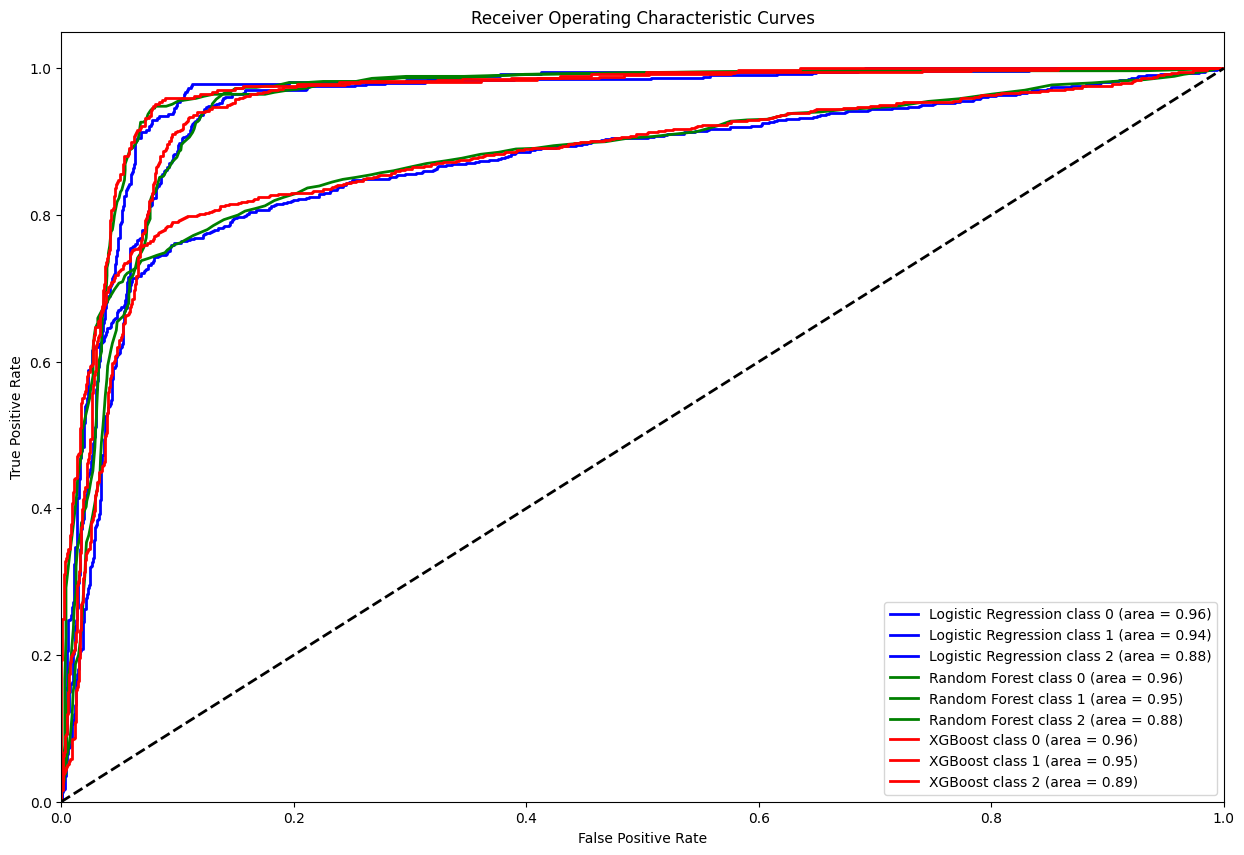

In [27]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

# Evaluate models and plot ROC curves
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'XGBoost': xgb}
colors = {'Logistic Regression': 'blue', 'Random Forest': 'green', 'XGBoost': 'red'}

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(15, 10))

for model_name, model in models.items():
    y_score = model.predict_proba(X_test_scaled)

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=colors[model_name],
                 lw=2, label=f'{model_name} class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()
